In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [35]:
df = pd.read_csv(r"E:\Jupyter Notebooks\titanic_toy.csv")

In [36]:
df.isnull().mean() # this is like how much percent of null values we have 

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(['Survived'], axis = 1), df['Survived'], 
                                               random_state = 42, test_size = 0.2)

In [38]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((712, 3), (179, 3), (712,), (179,))

Filling with arbitrary values

In [39]:
xtrain.describe()

Age        Fare      Family
count  572.000000  676.000000  712.000000
mean    29.498846   32.517788    0.932584
std     14.500059   52.545518    1.682525
min      0.420000    0.000000    0.000000
25%     21.000000    7.925000    0.000000
50%     28.000000   14.400000    0.000000
75%     38.000000   30.500000    1.000000
max     80.000000  512.329200   10.000000

From above we see that max values of age = 80 and fare = around 500 

so fillna with values above it or below the min value

In [40]:
xtrain['fare999'] = xtrain['Fare'].fillna(999)
xtrain['fareminus1'] = xtrain['Fare'].fillna(-1)

xtrain['age99'] = xtrain['Age'].fillna(99)
xtrain['ageminus1'] = xtrain['Age'].fillna(-1)

In [41]:
xtrain

Age      Fare  Family   fare999  fareminus1  age99  ageminus1
331  45.5   28.5000       0   28.5000     28.5000   45.5       45.5
733  23.0   13.0000       0   13.0000     13.0000   23.0       23.0
382  32.0    7.9250       0    7.9250      7.9250   32.0       32.0
704  26.0    7.8542       1    7.8542      7.8542   26.0       26.0
813   6.0   31.2750       6   31.2750     31.2750    6.0        6.0
..    ...       ...     ...       ...         ...    ...        ...
106  21.0    7.6500       0    7.6500      7.6500   21.0       21.0
270   NaN   31.0000       0   31.0000     31.0000   99.0       -1.0
860  41.0       NaN       2  999.0000     -1.0000   41.0       41.0
435  14.0  120.0000       3  120.0000    120.0000   14.0       14.0
102  21.0   77.2875       1   77.2875     77.2875   21.0       21.0

[712 rows x 7 columns]

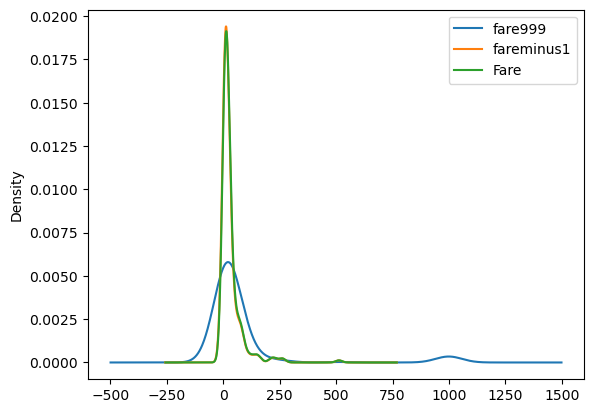

In [42]:
# distributions
xtrain['fare999'].plot(kind = 'kde', legend = '999')
xtrain['fareminus1'].plot(kind = 'kde', legend = '-1')
xtrain['Fare'].plot(kind = 'kde', legend = 'Fare')

plt.legend()

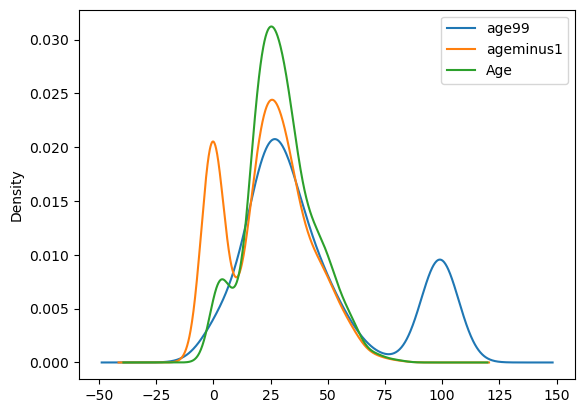

In [43]:
# bimodal ho gye distr kyuki null values kafi thi 
xtrain['age99'].plot(kind = 'kde', legend = '99')
xtrain['ageminus1'].plot(kind = 'kde', legend = '-1')
xtrain['Age'].plot(kind = 'kde', legend = 'Age')
plt.legend()

In [44]:
xtrain.cov()

Age         Fare     Family       fare999   fareminus1  \
Age         210.251707    75.481375  -6.993325    130.495777    69.137162   
Fare         75.481375  2761.031435  18.599163   2761.031435  2761.031435   
Family       -6.993325    18.599163   2.830892     16.878492    17.684447   
fare999     130.495777  2761.031435  16.878492  47525.470595  1063.944817   
fareminus1   69.137162  2761.031435  17.684447   1063.944817  2675.239405   
age99       210.251707  -111.965046  -6.941982   -255.051165  -101.137070   
ageminus1   210.251707   135.785804  -5.034556    262.712284   124.270305   

                 age99   ageminus1  
Age         210.251707  210.251707  
Fare       -111.965046  135.785804  
Family       -6.941982   -5.034556  
fare999    -255.051165  262.712284  
fareminus1 -101.137070  124.270305  
age99       932.966537 -166.460682  
ageminus1  -166.460682  315.995504

In [45]:
xtrain.corr()

Age      Fare    Family   fare999  fareminus1     age99  \
Age         1.000000  0.091482 -0.319651  0.039967    0.085422  1.000000   
Fare        0.091482  1.000000  0.207193  1.000000    1.000000 -0.069365   
Family     -0.319651  0.207193  1.000000  0.046016    0.203212 -0.135079   
fare999     0.039967  1.000000  0.046016  1.000000    0.094357 -0.038303   
fareminus1  0.085422  1.000000  0.203212  0.094357    1.000000 -0.064017   
age99       1.000000 -0.069365 -0.135079 -0.038303   -0.064017  1.000000   
ageminus1   1.000000  0.145071 -0.168329  0.067792    0.135159 -0.306576   

            ageminus1  
Age          1.000000  
Fare         0.145071  
Family      -0.168329  
fare999      0.067792  
fareminus1   0.135159  
age99       -0.306576  
ageminus1    1.000000

In [46]:
for col in xtrain.columns:
    print(col, "=" ,xtrain[col].var())

Age = 210.2517072477438
Fare = 2761.031434948639
Family = 2.830891765040513
fare999 = 47525.47059536007
fareminus1 = 2675.2394049177087
age99 = 932.9665366701436
ageminus1 = 315.99550362600644


Using sklearn

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(['Survived'], axis = 1), df['Survived'], 
                                               random_state = 42, test_size = 0.2)

In [48]:
# we could have taken diff objects for both the variables to impute them with different values
si = SimpleImputer(strategy = 'constant', fill_value = 999) 
xtrain['ageImpute'] = si.fit_transform(xtrain[['Age']])
xtrain['fareImpute'] = si.fit_transform(xtrain[['Fare']])

In [49]:
xtrain

Age      Fare  Family  ageImpute  fareImpute
331  45.5   28.5000       0       45.5     28.5000
733  23.0   13.0000       0       23.0     13.0000
382  32.0    7.9250       0       32.0      7.9250
704  26.0    7.8542       1       26.0      7.8542
813   6.0   31.2750       6        6.0     31.2750
..    ...       ...     ...        ...         ...
106  21.0    7.6500       0       21.0      7.6500
270   NaN   31.0000       0      999.0     31.0000
860  41.0       NaN       2       41.0    999.0000
435  14.0  120.0000       3       14.0    120.0000
102  21.0   77.2875       1       21.0     77.2875

[712 rows x 5 columns]

<AxesSubplot:ylabel='Density'>

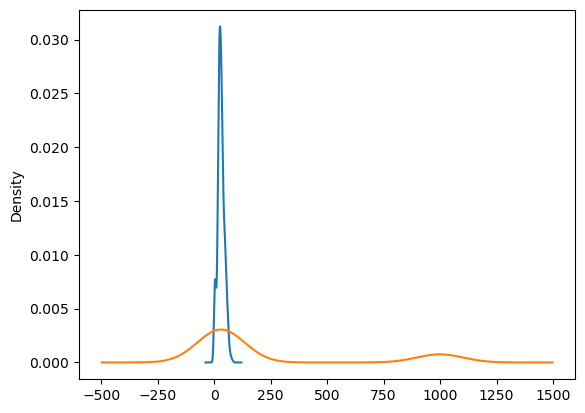

In [50]:
xtrain['Age'].plot(kind = 'kde')
xtrain['ageImpute'].plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

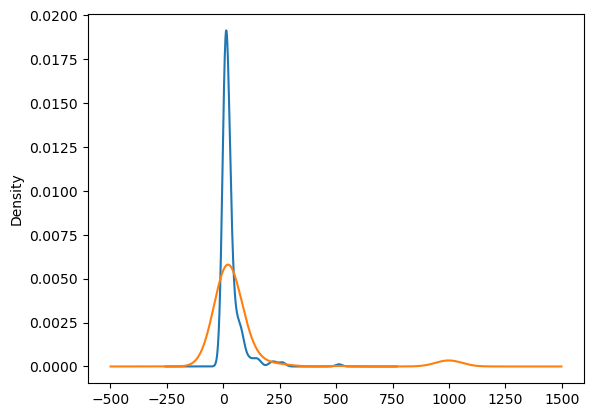

In [51]:
xtrain['Fare'].plot(kind = 'kde')
xtrain['fareImpute'].plot(kind = 'kde')